<a href="https://colab.research.google.com/github/shahriar1990/NLP_Project/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('25152746-spam.tsv', sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [9]:
#how many record by pecent
df['label'].value_counts() / (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [10]:
ham = df[df['label']== 'ham']
spam = df[df['label']=='spam']

In [12]:
ham = ham.sample(spam.shape[0])
ham

,label,message,length,punct
3405,ham,Then ü ask dad to pick ü up lar... Ü wan 2 sta...,62,6
3498,ham,"Oh, the grand is having a bit of a party but i...",121,3
3480,ham,Be sure to check your yahoo email. We sent pho...,59,1
4936,ham,"Hey babe, how's it going ? Did you ever figure...",83,4
2147,ham,So can collect ur laptop?,25,1
...,...,...,...,...
1677,ham,"Yeah, that's fine! It's £6 to get in, is that ...",50,6
4770,ham,watever reLation u built up in dis world only ...,120,3
2317,ham,That's cause your old. I live to be high.,41,3
658,ham,You will be in the place of that man,36,0


In [13]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [14]:
data = ham.append(spam,ignore_index=True)

In [15]:
data.shape

(1494, 4)

In [17]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [18]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


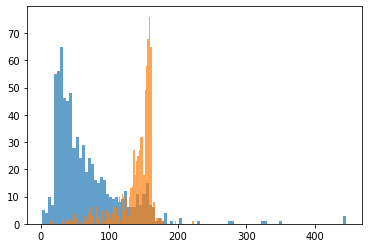

In [19]:
plt.hist(data[data['label'] == 'ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'],bins=100,alpha =0.7)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(data['message'],data['label'],
                                                 test_size = 0.3,random_state=0,
                                                 shuffle = True)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [24]:
classifier = Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [25]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spa

In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [29]:
accuracy_score(y_test,y_pred)

0.9510022271714922

In [30]:
confusion_matrix(y_test,y_pred)

array([[226,   1],
       [ 21, 201]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [32]:
from sklearn.svm import SVC

In [34]:
svm = Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC(C=100,gamma='auto'))])

In [35]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [37]:
y_pred = svm.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [39]:
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 21, 201]])

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.91      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [42]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [43]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [44]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']


In [45]:
text4 = ['No-one wants their mobile phone bombarded with spam texts']

In [46]:
print(classifier.predict(text4))

['ham']
